<a href="https://colab.research.google.com/github/Massittha/Data-portfolio/blob/main/My_KNeighbors_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors Classification

## Introduction
In this colab notebook, I created my own version of K Nearest Neighbors algorithm. The algorithm was used to make predictions on the breast cancer Wisconsin dataset from `sklearn library` to classify instances as either being benign or malignant. The results obtained were then compared with `sklearn` implementation.

The procedures include the following:
1. Load the breast cancer Wisconsin dataset
2. Create my own version of K Nearest Neighbors class
3. Split the data
4. Make predictions on the test set with my implementation
5. Make predictions on the test set with `sklearn` implementation
6. Compare the predictions
7. Perform K-Fold cross validation on both my algorithm and `sklearn` implementation to find the best `k value` for the models.
8. Implement the resulting `k values` to both models and evaluate their performance.

! Note that my version of algorithm is just to ensure my understanding of K-Nearest Neighbors Classification Method, not to optimize the performance in computation speed.




## 1. Load the dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
# Load data
from sklearn import datasets

cancer = datasets.load_breast_cancer()
X = cancer.data
Y = cancer.target

cancer_df = pd.DataFrame(data = np.c_[cancer['data'], cancer['target']],
                     columns= list(cancer['feature_names']) + ['target'])

cancer_df.target = cancer_df.target.astype('int')



### Check numbers of rows and columns, and see the data type of each feature

In [3]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Check number of classes in the target column

In [5]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

## 2. My version of KNeighborsClassifier

The class takes in the k value (n_neighbors). The `fit` function simply converts X and Y training sets into arrays. Predictions are made using the `predict` function, which receives data points to be predicted, turns them into arrays, and returns a list of the prediction of each data point.

The K-Nearest Neighbors algorithm is implemented in the `__most_neighbors` function, which underlies the `predict` function. It first calculates the euclidean distances from the data point to all points in the X training set. Then it stores a number of nearest points according to the `k value` and finally returns the majority class of the corresponding data points in Y training set.

In [6]:
class My_KNeighborsClassifier:
    import numpy as np

    def __init__(self,n_neighbors = 3):
        self.n_neighbors = n_neighbors

    def fit(self,X_train,Y_train):
        self.X_train = np.array(X_train)
        self.Y_train = np.array(Y_train)


    def predict(self,x):
        self.x = np.array(x)
        preds = []
        for i in range(len(self.x)):

            pred = self.__most_neighbors(self.x[i],self.n_neighbors)
            preds.append(pred)

        return preds

    def __most_neighbors(self,x,k):
        from scipy.stats import mode

        distances = []
        points_indexes = []

        for j , x_train in enumerate(self.X_train):

            diff2 = (x - x_train)**2
            dist = np.sqrt(diff2.sum())

            if len(distances) < k:
                distances.append(dist)
                points_indexes.append(j)
            else:
                if dist < max(distances):
                    replace = distances.index(max(distances))
                    distances[replace] = dist
                    points_indexes[replace] = j

        classes = [self.Y_train[y] for y in points_indexes]

        return int(mode(classes)[0])


## 3. Split the data
The `train_test_split` function from `sklearn.model_selection` was used to split the dataset into train and test sets

In [7]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 10)

## 4. Implementing my algorithm

In [8]:
# My algorithm
my_kNN = My_KNeighborsClassifier(n_neighbors = 3)
my_kNN.fit(X_train,y_train)
my_ypred = my_kNN.predict(X_train)

## 5. Implementing `sklearn` algorithm

In [9]:
# sklearn library
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
sk_ypred = knn.predict(X_train)

## 6. Compare the predictions

In [10]:
# check whether my algorithm gives the same result as sklearn

result = int((my_ypred == sk_ypred).mean()*100)

print("My algorithm vs sklearn KNeighborsClassifier\n")
print(f"Percentage of matching results: {result} %")

My algorithm vs sklearn KNeighborsClassifier

Percentage of matching results: 100 %


## 7. K-Fold Cross Validation to find the optimized k-value for the kNN model

Now that my algorithm has been verified to return the same outcome as `sklearn KNeighborsClassifier`, K-Fold cross validation will be performed to find the best k-value to be used for each kNN model, using the accuracy score as the metric. A comparison will be made once again on the average train accuracy scores and the average validation accuracy scores of the implementations.

`X_train` and `y_train` will be used as training data for the cross validation, and `X_test` and `y_test` will be the testing unseen data.

### Create a K-Fold Cross validation function
This function uses `KFold` function from `sklearn.model_selection` to randomly divide data into k sets. It trains and evaluates the model k times, each time using a different set as the validation set and others as training sets. It returns the mean training score and mean validation accuracy score at each k-value of KNeighbors.      

In [11]:
def cross_validate(max_k,model,X_train,y_train,random_state=10):
    import numpy as np
    from sklearn.model_selection import KFold
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score

    kf = KFold(n_splits=5, random_state=random_state, shuffle=True)

    train_accuracies = [[] for train in range(max_k)]
    val_accuracies = [[] for val in range(max_k)]

    # loop through k values
    for k in range(1,max_k+1):
        kNNCrossVal = model
        kNNCrossVal.n_neighbors = k

        iteration = 1
        # K-Fold Cross Validation loop

        for train_index, val_index in kf.split(X_train):
            Xtr, Xval = X_train[train_index], X_train[val_index]
            ytr, yval = y_train[train_index], y_train[val_index]


            kNNCrossVal.fit(Xtr,ytr)

            # make predictions

            pred_train = kNNCrossVal.predict(Xtr)
            pred_val = kNNCrossVal.predict(Xval)


            # calculate training and validation accuracy and store
            train_accuracies[k-1].append(accuracy_score(ytr, pred_train))
            val_accuracies[k-1].append(accuracy_score(yval, pred_val))
            print(f"k = {k}: Iteration {iteration}",end = " ")
            print(f"train accuracy: {round(train_accuracies[k-1][iteration-1],4)}, val accuracy: {round(val_accuracies[k-1][iteration-1],4)}")
            iteration +=1

    train_accuracy_mean = np.mean(train_accuracies, axis=1)
    val_accuracy_mean = np.mean(val_accuracies, axis=1)

    return list(train_accuracy_mean) , list(val_accuracy_mean)




### Cross Validate my model and sklearn model
Parse each model into the `cross_validate` function above, using `max_k = 30`

In [12]:
my_train_accuracy_mean, my_val_accuracy_mean  =  cross_validate(max_k = 30, model = My_KNeighborsClassifier(),X_train = X_train, y_train = y_train)

k = 1: Iteration 1 train accuracy: 1.0, val accuracy: 0.9451
k = 1: Iteration 2 train accuracy: 1.0, val accuracy: 0.956
k = 1: Iteration 3 train accuracy: 1.0, val accuracy: 0.9121
k = 1: Iteration 4 train accuracy: 1.0, val accuracy: 0.8681
k = 1: Iteration 5 train accuracy: 1.0, val accuracy: 0.8901
k = 2: Iteration 1 train accuracy: 0.967, val accuracy: 0.967
k = 2: Iteration 2 train accuracy: 0.9643, val accuracy: 0.9451
k = 2: Iteration 3 train accuracy: 0.9698, val accuracy: 0.9121
k = 2: Iteration 4 train accuracy: 0.967, val accuracy: 0.8462
k = 2: Iteration 5 train accuracy: 0.9698, val accuracy: 0.9231
k = 3: Iteration 1 train accuracy: 0.9533, val accuracy: 0.978
k = 3: Iteration 2 train accuracy: 0.9533, val accuracy: 0.9231
k = 3: Iteration 3 train accuracy: 0.9588, val accuracy: 0.9451
k = 3: Iteration 4 train accuracy: 0.9725, val accuracy: 0.8681
k = 3: Iteration 5 train accuracy: 0.9588, val accuracy: 0.9231
k = 4: Iteration 1 train accuracy: 0.9451, val accuracy: 0.9

In [13]:
sk_train_accuracy_mean , sk_val_accuracy_mean  = cross_validate(max_k = 30, model = KNeighborsClassifier(), X_train = X_train , y_train = y_train)

k = 1: Iteration 1 train accuracy: 1.0, val accuracy: 0.9451
k = 1: Iteration 2 train accuracy: 1.0, val accuracy: 0.956
k = 1: Iteration 3 train accuracy: 1.0, val accuracy: 0.9121
k = 1: Iteration 4 train accuracy: 1.0, val accuracy: 0.8681
k = 1: Iteration 5 train accuracy: 1.0, val accuracy: 0.8901
k = 2: Iteration 1 train accuracy: 0.967, val accuracy: 0.967
k = 2: Iteration 2 train accuracy: 0.9643, val accuracy: 0.9451
k = 2: Iteration 3 train accuracy: 0.9698, val accuracy: 0.9121
k = 2: Iteration 4 train accuracy: 0.967, val accuracy: 0.8462
k = 2: Iteration 5 train accuracy: 0.9698, val accuracy: 0.9231
k = 3: Iteration 1 train accuracy: 0.9533, val accuracy: 0.978
k = 3: Iteration 2 train accuracy: 0.9533, val accuracy: 0.9231
k = 3: Iteration 3 train accuracy: 0.9588, val accuracy: 0.9451
k = 3: Iteration 4 train accuracy: 0.9725, val accuracy: 0.8681
k = 3: Iteration 5 train accuracy: 0.9588, val accuracy: 0.9231
k = 4: Iteration 1 train accuracy: 0.9451, val accuracy: 0.9

### Check if both models obtain the same cross validation results
Comparing mean training accuracy scores and mean validation accuracy scores of both models

In [14]:
## Check train_accuracy_mean
my_train_accuracy_mean == sk_train_accuracy_mean

True

In [15]:
## Check val_accuracy_mean
my_val_accuracy_mean == sk_val_accuracy_mean

True

### Plot a graph of mean accuracy against k values
It can be seen that both my algorithm and `sklearn` implementation provided the same results. The graph also shows that at k = 8, the validation accuracy is at its peak. Therefore, this k-value will be used in the final model.


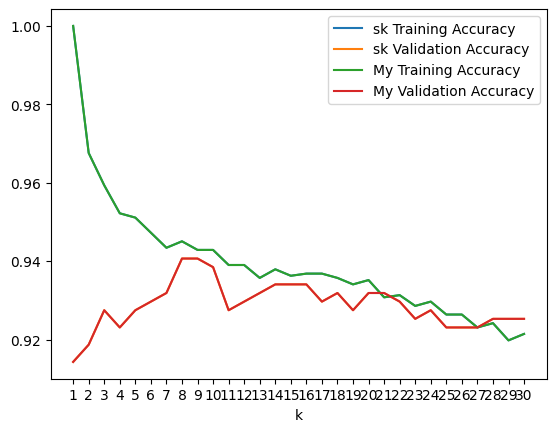

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
max_k = 30
fig = plt.figure()
x = list(range(1,max_k+1))
plt.plot(x,sk_train_accuracy_mean, label = 'sk Training Accuracy')
plt.plot(x,sk_val_accuracy_mean, label = 'sk Validation Accuracy')
plt.plot(x,my_train_accuracy_mean, label = 'My Training Accuracy')
plt.plot(x,my_val_accuracy_mean, label = 'My Validation Accuracy')
plt.xlabel('k')
plt.xticks(x)
plt.legend()

### Optimum k-value
Find the maximum mean validation accuracy and its corresponding mean training accuracy and its k-value.



In [17]:
## Max Validation accuracy:
my_max = max(my_val_accuracy_mean)
index = list({my_val_accuracy_mean.index(my_max)+1})[0]

fig = .4

print(f" The maximum mean validation accuracy is {max(my_val_accuracy_mean):{fig}f}")
print(f" and the correspoinding mean training accuracy is {my_train_accuracy_mean[index-1]:{fig}f}")
print(f" where the k-value is {index}")


 The maximum mean validation accuracy is 0.9407
 and the correspoinding mean training accuracy is 0.9451
 where the k-value is 8


## 8. Apply the final k value to each model

Both algorithms give exactly the same evaluation scores

In [18]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

my_kNN_test = My_KNeighborsClassifier(n_neighbors = 8)
my_kNN_test.fit(X_train,y_train)
ypred_test = my_kNN_test.predict(X_test)



print(f"Accuracy: {accuracy_score(y_test, ypred_test):{fig}f}")
print(f"Precision: {precision_score(y_test, ypred_test):{fig}f}")
print(f"Recall: {recall_score(y_test, ypred_test):{fig}f}")


Accuracy: 0.9298
Precision: 0.9467
Recall: 0.9467


In [20]:
sk_kNN_test = KNeighborsClassifier(n_neighbors = 8)
sk_kNN_test.fit(X_train,y_train)
sk_ypred_test = sk_kNN_test.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, sk_ypred_test):{fig}f}")
print(f"Precision: {precision_score(y_test, sk_ypred_test):{fig}f}")
print(f"Recall: {recall_score(y_test, sk_ypred_test):{fig}f}")

Accuracy: 0.9298
Precision: 0.9467
Recall: 0.9467


# Evaluation
For the selected k-value (8), the resulting accuracy scores from the KFold Cross Validation and the unseen testing data were  0.9407 and 0.9298 respectively, which were very close, suggesting that both `My_KNeighbors` and `sklearn KNeighbors` generalised with the unseen data.